In [ ]:
import os
import shutil
import random
import glob
import numpy as np
import cv2

In [ ]:
print(os.getcwd())

D:\Kuliah\Semester 6\PCD\Tugas Akhir


In [ ]:
print(os.listdir("..//Tugas Akhir//banana_data//data"))


['testing', 'training']


In [ ]:
train_fruit_images = []
train_fruit_labels = [] 
for directory_path in glob.glob("data/training/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (227, 227))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_fruit_images.append(img)
        train_fruit_labels.append(fruit_label)
train_fruit_images = np.array(train_fruit_images)
train_fruit_labels = np.array(train_fruit_labels)

In [ ]:
train_fruit_labels

array([], dtype=float64)

In [ ]:
#Kodingannya mulai dari sini

In [ ]:
loc = r'D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes1/dataset'

In [ ]:
label=[]
for i in os.listdir(loc):
    if i.split(" ")[0] == "underripe":
        label.append(0)
    elif i.split(" ")[0] =="ripe":
        label.append(1)
    elif i.split(" ")[0] == "overripe":
        label.append(2)

In [ ]:
# ini coretan
images = []
for file_name in os.listdir(loc):
    # Memeriksa apakah file memiliki ekstensi .jpg atau .png
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        file_path = os.path.join(loc, file_name)
        img = cv2.imread(file_path, cv2.IMREAD_COLOR)
        #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        images.append(img)
images = np.array(images)

C:\Users\ACER\AppData\Local\Temp\ipykernel_17452\1065205741.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array(images)


In [ ]:
#ekstrak fitur
gambar=[]     #list for features
for i in os.listdir(loc):
    img=cv2.imread(os.path.join(loc,i))  #joining the path of each image in the loop 
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    resized=cv2.resize(img,(120,120))   #resizing all imgaes to reduce computation and also give each image a dimension
    

    gambar.append(resized)

In [ ]:
gembor = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    h_channel = img_hsv[:, :, 0]  # Accessing only the H (hue) channel

    gembor.append(h_channel)

In [ ]:
gember = []  # list for features
for i in os.listdir(loc):
    img = cv2.imread(os.path.join(loc, i))  # joining the path of each image in the loop 
    img_lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
    a_channel = img_lab[:, :, 1]  # Accessing only the a channel

    gember.append(a_channel)

In [ ]:
np.array(gambar).shape

(1184, 240, 240, 3)

In [ ]:
import numpy as np

gambar_arr = []
gembor_arr = []
gember_arr = []

for i in range(len(gambar)):
    img = gambar[i]
    img_h = gembor[i]
    img_a = gember[i]
    
    # Resize gambar, gembor, dan gember ke ukuran yang sama
    img_resized = cv2.resize(img, (120, 120))
    img_h_resized = cv2.resize(img_h, (120, 120))
    img_a_resized = cv2.resize(img_a, (120, 120))
    
    gambar_arr.append(img_resized)
    gembor_arr.append(img_h_resized)
    gember_arr.append(img_a_resized)

gambar_arr = np.array(gambar_arr)
gembor_arr = np.array(gembor_arr)
gember_arr = np.array(gember_arr)

fitur = np.empty((len(gambar_arr), 120, 120, 5), dtype=np.uint8)
fitur[:, :, :, :3] = gambar_arr[:, :, :, 2::-1]  # R, G, B channels from gambar_arr
fitur[:, :, :, 3] = gembor_arr  # H channel from gembor_arr
fitur[:, :, :, 4] = gember_arr  # a channel from gember_arr

In [ ]:
gambar

[array([[[ 47,  29,  21],
         [ 50,  34,  27],
         [ 46,  33,  28],
         ...,
         [  5,   5,   7],
         [  4,   4,   6],
         [  4,   4,   6]],
 
        [[ 73,  54,  45],
         [ 71,  52,  45],
         [ 64,  49,  43],
         ...,
         [  7,   7,   9],
         [  7,   7,   9],
         [  7,   7,   9]],
 
        [[ 78,  58,  45],
         [ 73,  55,  43],
         [ 69,  54,  45],
         ...,
         [  8,   8,  10],
         [  9,   9,  11],
         [  9,   9,  11]],
 
        ...,
 
        [[159, 122,  96],
         [162, 125,  99],
         [160, 123,  97],
         ...,
         [115,  82,  39],
         [114,  81,  40],
         [112,  78,  39]],
 
        [[141, 104,  78],
         [144, 107,  81],
         [151, 113,  88],
         ...,
         [116,  83,  41],
         [115,  82,  43],
         [112,  78,  40]],
 
        [[141, 103,  80],
         [132,  94,  71],
         [128,  90,  67],
         ...,
         [117,  84,  43],
  

In [ ]:
240*240*3

172800

In [ ]:
print(len(images))
print(len(label))

1184
1184


In [ ]:
#definisikan X dan Y
X = np.array(gambar)
Y = np.array(label)
X = X.reshape(1184,172800)

In [ ]:
#definisikan X dan Y part new
X = np.array(fitur)
Y = np.array(label)
X = X.reshape(1184,72000)

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
#Bikin model randomforest
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
#akurasinya
rmodel.score(xtest,ytest)

0.6160337552742616

Mateng


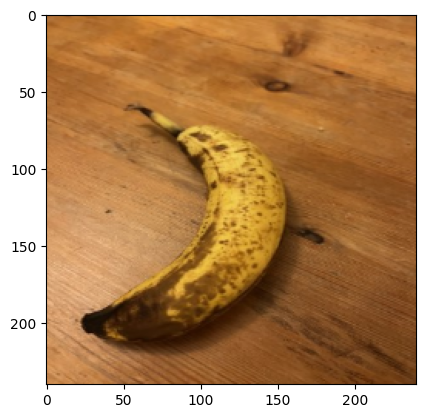

In [ ]:
#Testing
urutan = 10
prediksi = rmodel.predict(xtest[urutan].reshape(1, -1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")

resized_image = cv2.resize(xtest[urutan], (120, 120))
reshaped_image = resized_image.reshape(120, 120)
plt.imshow(reshaped_image)
plt.show()

In [ ]:
#bikin model svm
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(xtrain,ytrain)

SVC()

In [ ]:
#Training Accuracy
smodel.score(xtest,ytest)

0.6582278481012658

Mateng


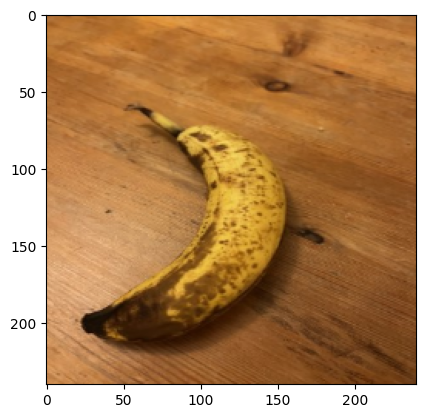

In [ ]:
urutan = 10
prediksi = rmodel.predict(xtest[urutan].reshape(1, -1))
if prediksi == 0:
    print("Belum Mateng")
elif prediksi == 1:
    print("Mateng")
elif prediksi == 2:
    print("Kematengan")

reshaped_image = cv2.resize(xtest[urutan].reshape(240, 240, 3), (120, 120))
plt.imshow(reshaped_image)
plt.show()

In [ ]:
img = cv2.imread('D:/Kuliah/Semester 6/PCD/Tugas Akhir/tes1/dataset/ripe (22).jpg')

img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)


In [ ]:
cv2.imshow("gg",img)
cv2.waitKey(0)

-1